Send this ipynb file with your code (solution) to econometrics.methods@gmail.com

In the subject of the e-mail, copy and paste only the title of this file without the extension ".ipynb"

Write the name of the members of your group in the e-mail, and not here.

Only one student will send me the solution. This student is responsible to copy other members of the group in the e-mail. 

In [0]:
# Run this cell to set up the notebook.
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

Today's lab has a few goals:

1. Get more practice with Pandas and visualization code.
2. Exercise some of the principles of visualization we've been learning about.
3. Do some basic prediction and inference.

We'll be analyzing a dataset of names.  The data were collected by the US Social Security Administration; it includes a large fraction of all people who were born in the United States in recent years.  (Because it is based on official government records, the dataset includes some anachronisms, including binary sex classification and the use of the word "gender" rather than "sex."  We've left it as we found it.)

Note: Most of the plotting in this lab can be done with `<DataFrame>.plot.<plot_method_name>`.  You can find the documentation for Pandas plotting [here](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

## What's in a name database?
We've included several CSV and PDF files in [`names.zip`](./names.zip).  These files are from [kaggle.com](https://www.kaggle.com/kaggle/us-baby-names)'s site for this dataset.  Peruse them to see what the data look like.  Note that Kaggle seems to have modified the data format, so the PDF descriptions are not exactly accurate!

In [0]:
path ='https://github.com/jcbain/celeb_baby_names/raw/master/data/NationalNames.csv'
names = pd.read_csv(path)

In [3]:
names.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


## EDA
Let's do some basic exploration.

#### Question 1
In the national database, how many people were recorded each year?  Create an appropriate visualization.

In [4]:
...

Ellipsis

#### Question 2
In the national database, among people born in the most recent year, what are the frequencies of the *most common* and *least common* names?  Create appropriate visualizations.

In [5]:
...

Ellipsis

#### Question 3
Using the plots you made in question 2, figure out one reason why the chart you made in question 1 probably understates the number of births per year in the US.  **Then** find a source online listing US births by year and check whether - and by how much - the chart understates the number of births.

*Write your answer here, replacing this text.*

#### Question 4
The visualization in question 2 didn't help us answer this question:

> "Among names of people born in 2014, what is the distribution of frequencies?"
    
Create a histogram to attempt to answer that question.  Your histogram should tell you, for example, how many names occurred fewer than 100 times.

In [6]:
...

Ellipsis

You should find that your histogram is not terribly useful, except to tell you that almost all names occurred fewer than, say, 500 times.  A few names are *much* more frequent than the others.  Your plot in question 2 should tell you what many of those names are.

Now consider the new question:

> "Among *people* born in 2014, what is the distribution of name popularity?"

#### Question 5
How this is a different question than the one in question 4?  How might the plot in question 4 mislead us about the answer to this new question?

*Write your answer here, replacing this text.*

The cell below creates a histogram helping us answer questions like this:

> "How many people had names occurring between 5000 and 5500 times?"

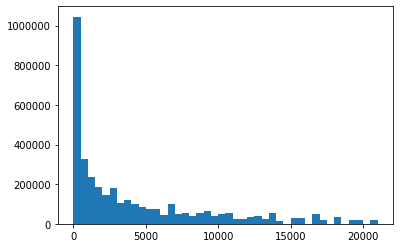

In [7]:
names_in_2014 = names[names['Year'] == 2014]
plt.hist(names_in_2014["Count"], weights=names_in_2014["Count"], bins=np.arange(0, names_in_2014["Count"].max()+500, 500));

#### Question 6
Create a visualization to help us answer questions like this:

> "How many people had names occurring fewer than 5000 times?"

Then use your visualization to estimate the number of people who had names occurring fewer than 2500 times, giving your estimate the name `num_people_with_rare_names`.

(This question is a bit more natural and should lead to a visualization that's more readable than our histogram.)

In [0]:
...

# Write in your estimate here.
num_people_with_rare_names = ...

You probably saw in question 2 that the least-common names occur 5 times in a year.  That's because the data are "censored" to remove names that occur fewer than 5 times.

#### Question 7
Why do you think the Social Security Administration does that?

*Write your answer here, replacing this text.*

However, you might imagine that it's possible to extrapolate from the pattern of name frequencies in the our data to the pattern of name frequencies for names that appeared 4 or fewer times.  Then we could try to answer interesting questions like, "How many distinct names were given to people born in 2014?"  In later weeks, we'll have the tools to do that.

# What if we'd had a sample?
We are pretty lucky to have a census of most US births.  Let's generate a random sample to see how it would affect our inferences in the remainder of the lab.

#### Question 8
You can generate a random sample of the rows of a Pandas table with the `sample` method, as in:

    names.sample(n = 10000, replace = False)

But if we did that, we wouldn't get the kind of dataset we'd see if the Social Security Administration had sampled randomly from people born in each year and reported their name counts.  Why not?

*Write your answer here, replacing this text.*

#### Question 9
Generate a random sample of 100,000 people born in 2014.  Do this by implementing the function `sample_counts_table` according to its documentation.  (Note that it should sample ***with replacement***.)  Call that function to compute a table called `sample_names_2014`.  It should have the same columns as `names`, and `sample_names_2014["Count"].sum()` should equal 100,000.

*Hint:* In `sample_counts_table`, use `groupby` to re-aggregate the table after sampling it.  Before returning the result, use `reset_index` to take the columns you pass to `groupby` out of the index and make them ordinary columns again.

In [0]:
def sample_counts_table(table, count_column_name, sample_size):
    """Given a table with a column of counts, produces a table that's a random sample from that table.
    
    The sampling is not done directly on the rows of the given table.  Instead, the sample
    is taken from a copy of that table, where each row is duplicated once per count.  Then
    the data are re-aggregated, so the resulting table looks similar to the original table,
    except that its counts are smaller (and sum to sample_size).
    
    Args:
        table (pd.DataFrame): Any DataFrame
        count_column_name (str): The name of a column in table.  That column should
                                 contain integer counts.
        sample_size (int): The size of the sample
    
    Returns:
        pd.DataFrame: A copy of table, but with total count equal to sample_size,
                      sampled randomly as described above.
    """
    ...

sample_names_2014 = ...

#### Question 10
Verify that your sample looks reasonable.  Do this by checking whether the following two bar charts look similar:
1. The frequencies of the top 5 names in 2014.
2. The frequencies of the top 5 names in 2014, using your sample.

In [0]:
n = 5
...
...

# Are names visually related to birth-assigned sex?
When you see a name for the first time in a familiar language (for example, in a fiction book), you can probably make a guess about the sex of the person with the name.  For example, a person named Almon is probably male, and a person named Alma is probably female.  What patterns has your brain learned to let you make such predictions?

One simple pattern you might guess is that names of females more often end in vowels, while names of males more often end in consonants.  Let's find out.

#### Question 11
For each letter in English, compute the proportion of males and females whose name ends with that letter.  Do this by filling in the function `pivot_by_ending` and calling it on `sample_names_2014`.  **Use your sample table, `sample_names_2014`, as in the filled-in code.**

Your table should look like this (but with different values and with 26 rows):

|Ending|F|M|
|-|-|-|-|
|a|.7|.3|
|b|.2|.8|

In [11]:
def pivot_by_ending(names):
    """Find the last letter of each name in the given table and pivot by
    that value and by gender.
    
    Args:
        names (pd.DataFrame): A table like `names_in_2014`, having at least
                              the following columns:
                               * 'Name': A column of strings
                               * 'Gender': A column of strings 'F' or 'M'
                               * 'Count': A column of integers, the number
                                 of individuals represented by each row
    Returns:
        pd.DataFrame: A table pivoted by last letter of name and by gender.
                      See above for an example."""
    # The next line will create a copy of names with an
    # extra column called "Ending".  Replace the ... with
    # a Series or array containing the last letters of
    # each name.
    with_ending = names.assign(Ending = ...)

    # Fill in the ellipses here to pivot your table.
    return with_ending.pivot_table(
        index=[...], # column(s) that will index the pivoted table
        columns=[...], # Each value in this column (or columns) will get its own column in the pivoted table.
        values=..., # the field to process in each group
        aggfunc=..., # the operation to apply to the collection of field values in each group
        fill_value=... # the default value for an empty cell in the resulting table
    )

sample_names_2014_by_ending = pivot_by_ending(sample_names_2014)

AttributeError: ignored

Run the next cell to make a bar chart of your results.  (The male proportion is 1 minus the female proportion.)

In [0]:
def compute_proportions(pivoted_by_letter):
    totals = pivoted_by_letter['M'] + pivoted_by_letter['F']
    return pd.DataFrame({
            "Ending": pivoted_by_letter.index.values,
            "Male proportion": pivoted_by_letter['M'] / totals,
            "Female proportion": pivoted_by_letter['F'] / totals})

proportions_in_2014_sample = compute_proportions(sample_names_2014_by_ending).sort_values("Female proportion", ascending=False)
proportions_in_2014_sample[["Female proportion"]].plot.bar(color="Pink");

#### Question 12
Discuss what the chart tells us.  Is there a strong association between sex and the last letter of a name in our sample?

# Uncertainty
The bar chart was built from a sample.  It's possible that the relationships we saw don't really exist in the full dataset.

To quantify our uncertainty, let's run the bootstrap.  We can reuse most of our earlier code. (That's why we packaged everything into functions.)

#### Question 13
Compute 200 bootstrap resamples from `sample_names_2014`.  For each resample, compute a table of proportions by calling your `compute_proportions` and `pivot_by_ending` functions on it.

In [0]:
# Constants provided for your convenience.
num_resamples = 200
resample_size = 100000

# Compute a list of num_resamples tables, each one like `proportions_in_2014_sample`.
# Each should be based on a resample of sample_names_2014.
# This should take around a minute.
resamples = ...

The cell below displays your bootstrapped proportions.

In [0]:
resample_proportions = pd.concat(resamples)
sns.boxplot(x="Ending",
            y="Female proportion",
            data=resample_proportions,
            order=proportions_in_2014_sample["Ending"],
            color="Pink");

In [0]:
compute_proportions(pivot_by_ending(names_in_2014))\
    .loc[proportions_in_2014_sample["Ending"]]\
    [["Female proportion"]]\
    .plot.bar(color=("Pink"));
plt.title("")

#### Question 14
Why is the box for names ending in 'q' so wide?

*Write your answer here, replacing this text.*